<a href="https://colab.research.google.com/github/MatteoOnger/NIAC_Project/blob/main/NIAC_PMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NIAC Project: Pacman Maze Solver**

*   **Authors:** Stefano Capelli, Matteo Onger
*   **Date:** March 2025

**Documentation**:
*   Gymnasium: [website](https://gymnasium.farama.org/)
*   Scallop & Scallopy: [paper](https://www.researchgate.net/publication/369945806_Scallop_A_Language_for_Neurosymbolic_Programming), [repository](https://github.com/scallop-lang/scallop), [website](https://www.scallop-lang.org/)
*   Pacman Maze game: [description](https://www.scallop-lang.org/ssnp24/index.html#section-17:~:text=2%3A%20PacMan%20Agent-,In,-this%20part%2C%20we)

**Notes**:
*   ...

In [1]:
# download project repository
!git clone -b main https://github.com/MatteoOnger/NIAC_Project.git

# download Scallopy
!wget https://github.com/scallop-lang/scallop/releases/download/0.1.4/scallopy-0.1.4-cp39-cp39-manylinux_2_27_x86_64.whl

Cloning into 'NIAC_Project'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 64 (delta 25), reused 28 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 203.05 KiB | 2.67 MiB/s, done.
Resolving deltas: 100% (25/25), done.
--2025-03-24 19:42:02--  https://github.com/scallop-lang/scallop/releases/download/0.1.4/scallopy-0.1.4-cp39-cp39-manylinux_2_27_x86_64.whl
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/517484315/ea06f7dd-5ae7-4315-9406-ade8f28e6b86?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250324%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250324T194202Z&X-Amz-Expires=300&X-Amz-Signature=5b69bb1ec1974d5da020f6e7750aeb958e72ce

In [2]:
# download and install Miniconda
%env PYTHONPATH=

!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh
!chmod +x /content/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh
!bash Miniconda3-py311_25.1.1-2-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

env: PYTHONPATH=
--2025-03-24 19:42:03--  https://repo.anaconda.com/miniconda/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153120581 (146M) [application/octet-stream]
Saving to: ‘Miniconda3-py311_25.1.1-2-Linux-x86_64.sh’

Miniconda3-py311_25 100%[===================>] 146.03M   122MB/s    in 1.2s    

2025-03-24 19:42:04 (122 MB/s) - ‘Miniconda3-py311_25.1.1-2-Linux-x86_64.sh’ saved [153120581/153120581]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [3]:
# force creation of the virtual environment 'niac'
!conda env remove -n niac -y || true
!conda env create -f /content/NIAC_Project/environment.yaml -y
!conda env list


EnvironmentLocationNotFound: Not a conda environment: /usr/local/envs/niac

Channels:
 - conda-forge
 - menpo
 - defaults
Platform: linux-64
Solving environment: | done


==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



python-3.9.21        | 22.5 MB   | :   0% 0/1 [00:00<?, ?it/s]
tk-8.6.13            | 3.2 MB    | :   0% 0/1 [00:00<?, ?it/s]

openssl-3.4.1        | 2.8 MB    | :   0% 0/1 [00:00<?, ?it/s]


pip-25.0.1           | 1.2 MB    | :   0% 0/1 [00:00<?, ?it/s]



libsqlite-3.49.1     | 897 KB    | :   0% 0/1 [00:00<?, ?it/s]




ncurses-6.5          | 871 KB    | :   0% 0/1 [00:00<?, ?it/s]





libgcc-14.2.0        | 828 KB    | :   0% 0/1 [00:00<?, ?it/s]






setuptools-75.8.2    | 760 KB    | :   0% 0/1 [00:00<?, ?it/s]







ld_impl_linux-64-2.4 | 656 KB    | :   0% 0/1 [00:00<?, ?it/s]








libgomp-14.2.0       | 449 KB    | : 

---

In [4]:
%%bash
source activate niac
python3

import sys
print(f"-----\nCurrent Python version: {sys.version}\n-----")

import scallopy
ctx = scallopy.ScallopContext()

ctx.add_relation("hello", str)
ctx.add_facts("hello", [("Hello World",)])
ctx.run()

print(list(ctx.relation("hello")))
quit()

-----
Current Python version: 3.9.21 | packaged by conda-forge | (main, Dec  5 2024, 13:51:40) 
[GCC 13.3.0]
-----
[('Hello World',)]


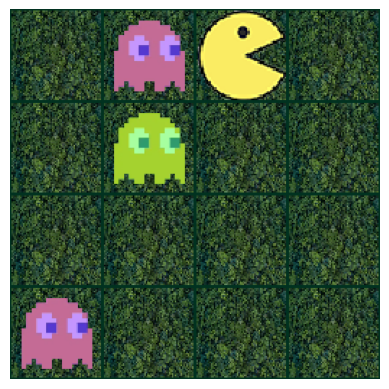

Tot reward:1.0


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time

from IPython.display import clear_output
from NIAC_Project.pacman.arena import AvoidingArena


env = AvoidingArena(render_mode="rgb_array", grid_dim=(4,4), num_enemies=3)
env.reset()

counter = 0
tot_reward = 0
end_episode = False

while not end_episode:
    action = np.random.randint(0, 4)
    observation, reward, terminated, truncated, info = env.step(action)
    tot_reward += reward

    clear_output(wait=True)
    plt.imshow(env.render())
    plt.axis('off')
    plt.show()
    time.sleep(.1)

    end_episode = terminated or truncated or (counter > 10)
    counter += 1

env.close()
print(f"Tot reward:{tot_reward}")